In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def load_data(file_path):
    df = pd.read_csv(file_path)
    df.columns = ["thread_subject", "username", "page_name"]
    return df

def build_network(df):
    G = nx.Graph()
    grouped = df.groupby(["page_name", "thread_subject"])
    for (page, thread), group in grouped:
        users = group["username"].unique()
        for i in range(len(users)):
            for j in range(i + 1, len(users)):
                G.add_edge(users[i], users[j])
    return G

def network_metrics_analysis(file_path, title="Wikidata Editor Network"):
    print(f"\n--- Analyzing Network: {title} ---")
    df = load_data(file_path)
    G = build_network(df)

    # Average degree
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    print(f"Average degree: {avg_degree:.2f}")

    # Clustering coefficient
    avg_clustering = nx.average_clustering(G)
    print(f"Average clustering coefficient: {avg_clustering:.4f}")

    # Average shortest path
    if nx.is_connected(G):
        avg_path_length = nx.average_shortest_path_length(G)
        print(f"Average shortest path length: {avg_path_length:.4f}")
    else:
        print("Graph is not connected; computing for largest component...")
        largest_cc = G.subgraph(max(nx.connected_components(G), key=len))
        avg_path_length = nx.average_shortest_path_length(largest_cc)
        print(f"Average shortest path length (largest component): {avg_path_length:.4f}")

    # Compare with random graph
    random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), nx.density(G))
    rand_avg_clustering = nx.average_clustering(random_graph)
    rand_avg_path_length = (
        nx.average_shortest_path_length(random_graph)
        if nx.is_connected(random_graph) else "N/A"
    )

    print("\n--- Comparison with Random Network ---")
    print(f"Random network average clustering coefficient: {rand_avg_clustering:.4f}")
    print(f"Random network average path length: {rand_avg_path_length}")

    # Degree distribution
    degrees = [d for _, d in G.degree()]
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=30, color='skyblue', edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution - {title}")
    plt.tight_layout()
    plt.show()



--- Analyzing Network: Large Network ---
Average degree: 20.43
Average clustering coefficient: 0.7001
Graph is not connected; computing for largest component...
Average shortest path length (largest component): 2.7406

--- Comparison with Random Network ---
Random network average clustering coefficient: 0.0053
Random network average path length: 3.020557023198781


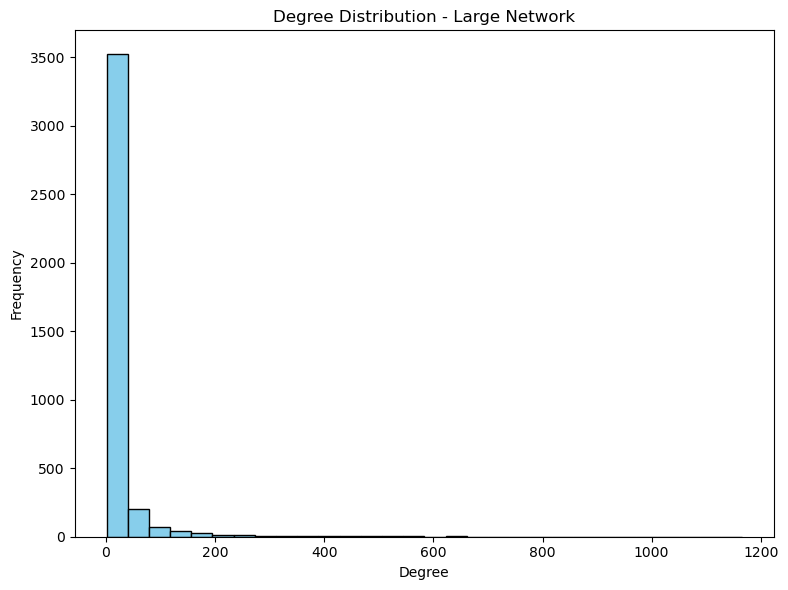

In [2]:
network_metrics_analysis("data/datasets/PROJECT_CHAT.csv", title="Large Network")